# Softmax方策の方策勾配の収束について

参考：
* [On the Global Convergence Rates of Softmax Policy Gradient Methods](https://arxiv.org/abs/2005.06392)

真の勾配情報があれば方策勾配法が$O(1/t)$で収束することを見ていきます．

準備：
* softmax方策： $\pi_\theta(a \mid s)=\frac{\exp \{\theta(s, a)\}}{\sum_{a^{\prime}} \exp \left\{\theta\left(s, a^{\prime}\right)\right\}}$
  * ちなみにlogistic regressionの背景から，$\theta(s, a)$はlogitsと呼ばれたりします．
* 行動集合上の分布$\pi$に対して，$H(\pi):=\operatorname{diag}(\pi)-\pi \pi^{\top} \in \mathbb{R}^{K \times K}$とします．ここで，行動集合は$[K]$とします．
  * $H(\pi_\theta)$は $\theta\mapsto \pi_\theta := \operatorname{softmax}(\theta)$のJacobian（$\mathbb{R}^{[K]}$から$(K-1)$-simplexへの写像）を表します：
$$
\left(\frac{d \pi_\theta}{d \theta}\right)^{\top}=H\left(\pi_\theta\right)
$$
* $\beta$-smoothness：$\left|f\left(\theta^{\prime}\right)-f(\theta)-\left\langle\frac{d f(\theta)}{d \theta}, \theta^{\prime}-\theta\right\rangle\right| \leq \frac{\beta}{2} \cdot\left\|\theta^{\prime}-\theta\right\|_2^2$

方策勾配定理：
$$
\frac{\partial V^{\pi_\theta}(\mu)}{\partial \theta(s, a)}=\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot \pi_\theta(a \mid s) \cdot A^{\pi_\theta}(s, a)
$$

---

Softmaxのときの方策勾配定理を導出しましょう．
$s^{\prime} \neq s$ならば$\frac{\partial \pi_\theta\left(a \mid s^{\prime}\right)}{\partial \theta(s, \cdot)}=\mathbf{0}$なので，
$$
\begin{aligned}
\frac{\partial V^{\pi_\theta}(\mu)}{\partial \theta(s, \cdot)} & =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot\left[\sum_a \frac{\partial \pi_\theta(a \mid s)}{\partial \theta(s, \cdot)} \cdot Q^{\pi_\theta}(s, a)\right] \\
& =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot\left(\frac{d \pi(\cdot \mid s)}{d \theta(s, \cdot)}\right)^{\top} Q^{\pi_\theta}(s, \cdot) \\
& =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot H\left(\pi_\theta(\cdot \mid s)\right) Q^{\pi_\theta}(s, \cdot)
\end{aligned}
$$

さらに，$H\left(\pi_\theta(\cdot \mid s)\right)=\operatorname{diag}\left(\pi_\theta(\cdot \mid s)\right)-\pi_\theta(\cdot \mid s) \pi_\theta(\cdot \mid s)^{\top}$なので，

$$
\begin{aligned}
\frac{\partial V^{\pi_\theta}(\mu)}{\partial \theta(s, a)} & =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot \pi_\theta(a \mid s) \cdot\left[Q^{\pi_\theta}(s, a)-\sum_a \pi_\theta(a \mid s) \cdot Q^{\pi_\theta}(s, a)\right] \\
& =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot \pi_\theta(a \mid s) \cdot\left[Q^{\pi_\theta}(s, a)-V^{\pi_\theta}(s)\right] \quad\left(\text { using } V^{\pi_\theta}(s)=\sum_a \pi_\theta(a \mid s) \cdot Q^{\pi_\theta}(s, a)\right) \\
& =\frac{1}{1-\gamma} \cdot d_\mu^{\pi_\theta}(s) \cdot \pi_\theta(a \mid s) \cdot A^{\pi_\theta}(s, a)
\end{aligned}
$$

---


## バンディットの場合

まずはバンディットの場合の収束レートについて見てみましょう．つまり，

$$\max _{\theta: \mathcal{A} \rightarrow \mathbb{R}} \underset{a \sim \pi_\theta}{\mathbb{E}}[r(a)]$$

を考えます．

**注意！：Softmax方策のとき，$\theta \mapsto \mathbb{E}_{a \sim \pi_\theta}[r(a)]$ は凹関数ではありません．詳しくはProposition 1参照．**

状態が一個しかないので，勾配は次で取れます．
$$\frac{d \pi_\theta^{\top} r}{d \theta(a)}=\pi_\theta(a) \cdot\left(r(a)-\pi_\theta^{\top} r\right)$$

このとき，次の更新方法を考えてみましょう．

$$
\theta_{t+1}(a) \leftarrow \theta_t(a)+\eta \cdot \pi_{\theta_t}(a) \cdot\left(r(a)-\pi_{\theta_t}^{\top} r\right), \forall a \in[K]
$$

ちなみに$\theta \mapsto \pi_\theta^\top r$は$5/2$-smoothです．（証明略）

---

softmaxの場合でも，次のGradient dominanceが成立します（これはNon-uniform Łojasiewicz条件とも呼ばれます．gradient dominanceについては[RL_PolicyGrad_convergence_rate.ipynb](RL_PolicyGrad_convergence_rate.ipynb)参照）：

$$
\left\|\frac{d \pi_\theta^{\top} r}{d \theta}\right\|_2 \geq \pi_\theta\left(a^*\right) \cdot\left(\pi^*-\pi_\theta\right)^{\top} r
$$

ちなみにこれは$\pi_\theta(a^*)$が右辺に出てきてるのでnon-uniform と呼ばれます．例えば$\pi_{\theta_t}(a^*)$が非常に小さいと役に立たないので，non-uniformです．これは他のPolicy gradientのDominanceも同じ問題を抱えてます（大体は初期状態分布を$\mu > 0$にして解決してます．

**証明は略**

---

さて，このDominanceを使うと収束について次の２つが言えます．$c_t=\min _{1 \leq s \leq t} \pi_{\theta_s}\left(a^*\right)$および$\eta=2/5$とすると，
* $\left(\pi^*-\pi_{\theta_t}\right)^{\top} r \leq 5 /\left(t \cdot c_t^2\right)$
* $\sum_{t=1}^T\left(\pi^*-\pi_{\theta_t}\right)^{\top} r \leq \min \left\{\sqrt{5 T} / c_T,(5 \log T) / c_T^2+1\right\}$

$c_t$は$\theta_s$が$a^*$を通る確率を表します．これは非ゼロではありますが，非常に小さくなる可能性もあります（例えば$\theta_1$の値が全然$a^*$に沿わない場合など）．
この$c_t$への依存性はnon-uniform Łojasiewiczのせいです．**実は$\pi_{\theta_t}(a^*)$への依存性は取り除けません．**

例えば，$r=(5, 4, 4)^\top$，$\pi_\theta=(2 \epsilon, 1 / 2-2 \epsilon, 1 / 2)$の時を考えましょう．$\epsilon > 0$です．
明らかに$\pi_\theta(a^*)$は$2\epsilon$ですね．

このとき，簡単な計算で
* $(\pi^* - \pi_\theta)^\top r=1 - 2\epsilon > 1/2$
* $\frac{d \pi_\theta^{\top} r}{d \theta}=\left(2 \epsilon-4 \epsilon^2,-\epsilon+4 \epsilon^2,-\epsilon\right)^{\top}$
* $\left\|\frac{d \pi_\theta^{\top} r}{d \theta}\right\|_2=\epsilon \cdot \sqrt{6-24 \epsilon+32 \epsilon^2} \leq 3 \epsilon$

が成り立ちます．よって，

$$
\pi_\theta\left(a^*\right) \cdot\left(\pi^*-\pi_\theta\right)^{\top} r
=
2 \epsilon \cdot\left(\pi^*-\pi_\theta\right)^{\top} r>2\epsilon / 2>3 \epsilon \geq\left\|\frac{d \pi_\theta^{\top} r}{d \theta}\right\|_2
\geq
\pi_\theta\left(a^*\right) \cdot\left(\pi^*-\pi_\theta\right)^{\top} r
$$

が成り立つので，これはタイトなバウンドになってます．

---

上の補題だけでは$O(1/t)$で収束することを示せません．なぜなら，$c_t$が$1/t$よりも早く消えてしまうかもしれないからです．
実はこれは気にしなくても大丈夫です．次が成立します．

* $\inf _{t \geq 1} \pi_{\theta_t}\left(a^*\right)>0$
* 任意の初期化に対して，$t\geq t_0$以降の$t\mapsto \pi_{\theta_t}(a^*)$が単調に増加するような$t_0$が存在する．特に$\pi_{\theta_1}$が一様方策ならば，$t_0=1$

証明はテクニカルなので省略します．２つ目から「$c_t$が$1/t$よりも早く消えてしまう」ことを気にしなくて良いです．
方策が一様方策なら早く収束することが言えそうです．本当にそうか，確かめてみましょう．
論文のFigure 1を再現します．

In [9]:
import numpy as np
from scipy.special import softmax

# 明らかにa*はa=0です．
r = np.array([1.0, 0.9, 0.1])
theta_1 = np.log(np.array([0.05, 0.01, 0.94]))
theta_2 = np.log(np.array([0.01, 0.05, 0.94]))
lr = 2 / 5

def update_pol_grad(theta):
    pi = softmax(theta)
    grad = pi * (r - pi @ r)
    theta = theta + lr * grad
    return theta


def eval_pol(theta):
    pi = softmax(theta)
    ret = pi @ r
    a_prob = pi[0]
    return ret, a_prob

good_ret = []
good_a_prob = []
bad_ret = []
bad_a_prob = []



for k in range(10000):
    theta_1 = update_pol_grad(theta_1)
    ret_1, a_prob_1 = eval_pol(theta_1)
    good_ret.append(ret_1)
    good_a_prob.append(a_prob_1)

    theta_2 = update_pol_grad(theta_2)
    ret_2, a_prob_2 = eval_pol(theta_2)
    bad_ret.append(ret_2)
    bad_a_prob.append(a_prob_2)


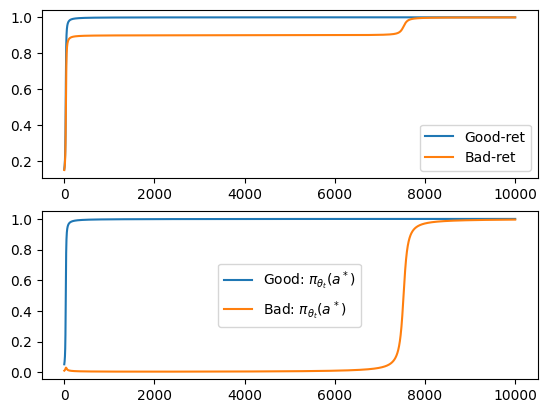

In [14]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(good_ret, label="Good-ret")
plt.plot(bad_ret, label="Bad-ret")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(good_a_prob, label=r"Good: $\pi_{\theta_t}(a^*)$")
plt.plot(bad_a_prob, label=r"Bad: $\pi_{\theta_t}(a^*)$")

plt.legend()

この結果はつまり，状態数が１つでも，初期方策によっては収束が異常に遅くなり得ることを示してます．

## MDPの場合

MDPの場合は次の最適化問題を考えます．

$$
\max _{\theta: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}} V^{\pi_\theta}(\rho)=\max _{\theta: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}} \mathbb{E}_{ s \sim \rho} \sum_a \pi_\theta(a \mid s) \cdot Q^{\pi_\theta}(s, a)
$$

さて，[RL_PolicyGrad_convergence_rate.ipynb](RL_PolicyGrad_convergence_rate.ipynb)でやったように，一般に収束には初期状態分布が$\mu(s) > 0$が全ての$s$について成立しなければいけません．しかし，次の補題が成立します：

---

次を満たすMDP，$\theta^*$と$\min_{s} \mu(s)=0$であるような$\mu$が存在する：

$\theta^*$が$\theta\to V^{\pi_\theta}(\mu)$の停留点であり，$\pi_{\theta^*}$が最適解ではない．さらに，この停留点はattractorであり，勾配はこの停留点に収束する．

**証明**

これは$S$バンディットを作れば証明できます．
* それぞれの状態$s\in \mathcal{S}$で，どの行動を選択しても同じ状態に帰るとします．
* 各状態には最適な行動が１つ存在するように報酬を設定します．
* もし$\mu(s)=0$となる$s$があると，明らかに$\theta$は更新されません．

---


### 収束について （TODO）

* [Softmax Policy Gradient Methods Can Take Exponential Time to Converge](https://arxiv.org/abs/2102.11270)：こっちも読もう



## エントロピー正則化 (TODO)